In [51]:
import pandas as pd
import sns as sns

In [52]:
# Load the dataset
file_path = r'./data/training.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,id,T1,T2,S,TO,S1,S2,class label
0,1.0,"WESLEY PRUDEN: Obama weak, confused and 'unabl...","For all his softness on Islam, Barack Obama ha...",Washington Times,obama,-0.069444,-0.112931,4.0
1,4.0,"As the sun sets on Microsoft's Sunrise, here a...",Microsoft announced this week that by the end ...,AppleInsider (press release) (blog),microsoft,0.096225,-0.156386,2.0
2,5.0,Obama administration releases rules on wellnes...,A federal agency on Monday released final rule...,Reuters,obama,0.377964,0.000000,3.0
3,6.0,Dear Media: President Obama Actually Did Addre...,Republicans have a new thing to blame Presiden...,Mediaite,obama,0.177083,-0.297681,3.0
4,11.0,Global Financial Turmoil: A Severe Worldwide E...,"Likewise, the economic effects of a deflationa...",Center for Research on Globalization,economy,-0.477297,-0.086881,3.0


- id: A unique identifier for the data
- T1, T2: Two text fields, which may be the article title, abstract, or other text data
- S: Source field, most likely referring to the source of the article or content
- TO: The target object, which may be the topic or entity discussed in the text
- S1, S2: Numeric fields, possibly some rating or other metric associated with T1 and T2
- label: The class label

# 1. EDA

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31365 entries, 0 to 31364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  float64
 1   T1           30000 non-null  object 
 2   T2           29996 non-null  object 
 3   S            29997 non-null  object 
 4   TO           30000 non-null  object 
 5   S1           30000 non-null  float64
 6   S2           30000 non-null  float64
 7   class label  30000 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.9+ MB


In [54]:
missing_values = data.isnull().sum()
missing_values

id             1365
T1             1365
T2             1369
S              1368
TO             1365
S1             1365
S2             1365
class label    1365
dtype: int64

In [55]:
# Descriptive statistics for numerical variables
numerical_stats = data.describe()

# Distribution of class labels
class_label_distribution = data['class label'].value_counts(normalize=True) * 100

numerical_stats, class_label_distribution

(                 id            S1            S2   class label
 count  30000.000000  30000.000000  30000.000000  30000.000000
 mean   29791.514467     -0.006920     -0.026114      2.744700
 std    17213.515148      0.136875      0.142379      1.466286
 min        1.000000     -0.950694     -0.732337      1.000000
 25%    14847.750000     -0.079210     -0.112641      1.000000
 50%    29867.500000      0.000000     -0.025516      2.000000
 75%    44705.250000      0.062720      0.061374      4.000000
 max    59506.000000      0.962354      0.964646      5.000000,
 class label
 1.0    26.893333
 2.0    24.603333
 5.0    18.236667
 4.0    16.386667
 3.0    13.880000
 Name: proportion, dtype: float64)

- id: Identifier that ranges from 1 to 59,506, with a mean of about 29,791 and a standard deviation of about 17,213.
- S1 and S2: Two scoring metrics whose mean is close to 0 and standard deviation is about 0.14, with minimum and maximum values indicating that the scores are distributed over a wide range.
- class label: The class label has 5 different values and shows the distribution of the dataset. The distribution of these categories is not completely uniform, with category 1 accounting for about 26.89%, while category 3 accounting for the least, about 13.88%. This means that the dataset is imbalanced across classes, which is an important consideration for training a classification model.

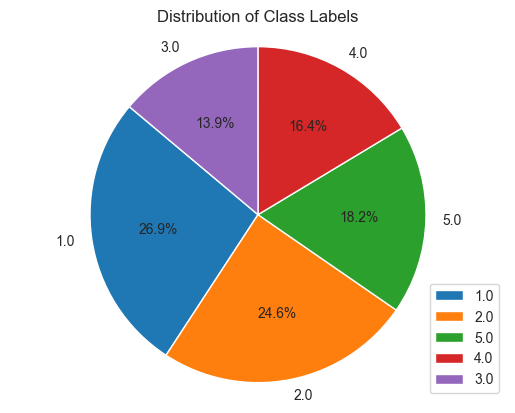

In [56]:
from matplotlib import pyplot as plt

class_label_counts = data['class label'].value_counts()

# Plot a pie chart for the class label distribution with legend
patches, texts, autotexts = plt.pie(class_label_counts, labels=class_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Class Labels')
plt.legend(patches, class_label_counts.index, loc="lower right")

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart shows the distribution of the class label column, which can help you visualize the proportion of different classes in the dataset.

C:\Users\10754\AppData\Local\Temp\ipykernel_36504\2597841173.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0)


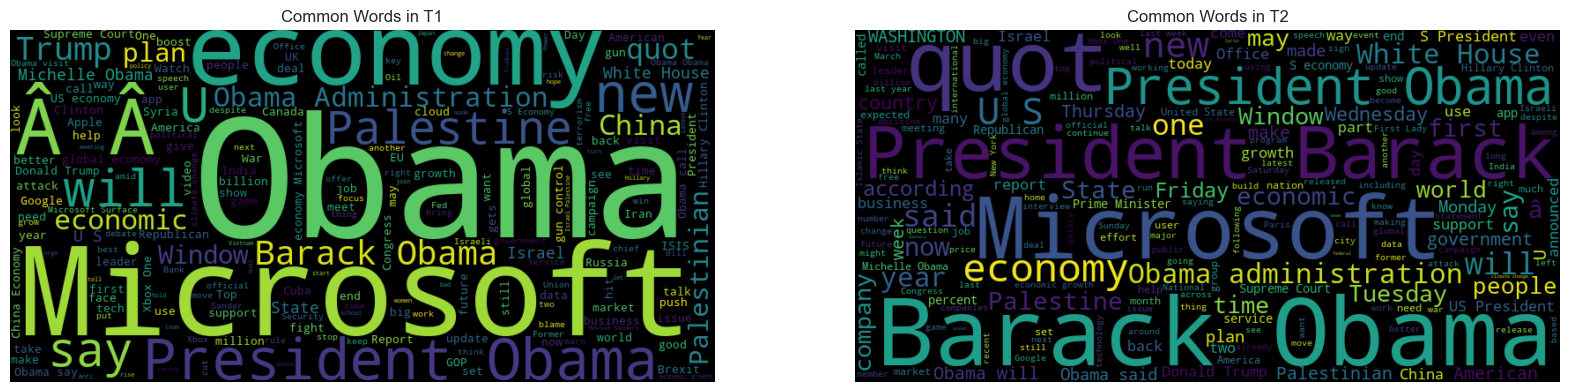

In [57]:
from wordcloud import WordCloud

# Define a 1x2 subplot structure for word clouds
fig, ax = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'wspace': 0.2})

# Generate word cloud for T1
wordcloud_t1 = WordCloud(width=800, height=400).generate(' '.join(data['T1'].dropna()))
ax[0].imshow(wordcloud_t1, interpolation='bilinear')
ax[0].set_title('Common Words in T1')
ax[0].axis('off')

# Generate word cloud for T2
wordcloud_t2 = WordCloud(width=800, height=400).generate(' '.join(data['T2'].dropna()))
ax[1].imshow(wordcloud_t2, interpolation='bilinear')
ax[1].set_title('Common Words in T2')
ax[1].axis('off')

# Show the plot
plt.tight_layout(pad=0)
plt.show()

- T1 Word cloud: This word cloud reflects the key concepts and topics in the T1 text. It might represent a news headline, a key event, or the name of a person. The frequent words can help us understand the most frequently discussed topics or foci in the dataset.
- T2 Word cloud: T2 text may contain more detailed content, such as the body or abstract of a news article. The word cloud of T2 shows a diverse set of words that have a high frequency of occurrence in the dataset, thus providing insight into the depth and width of the text content.

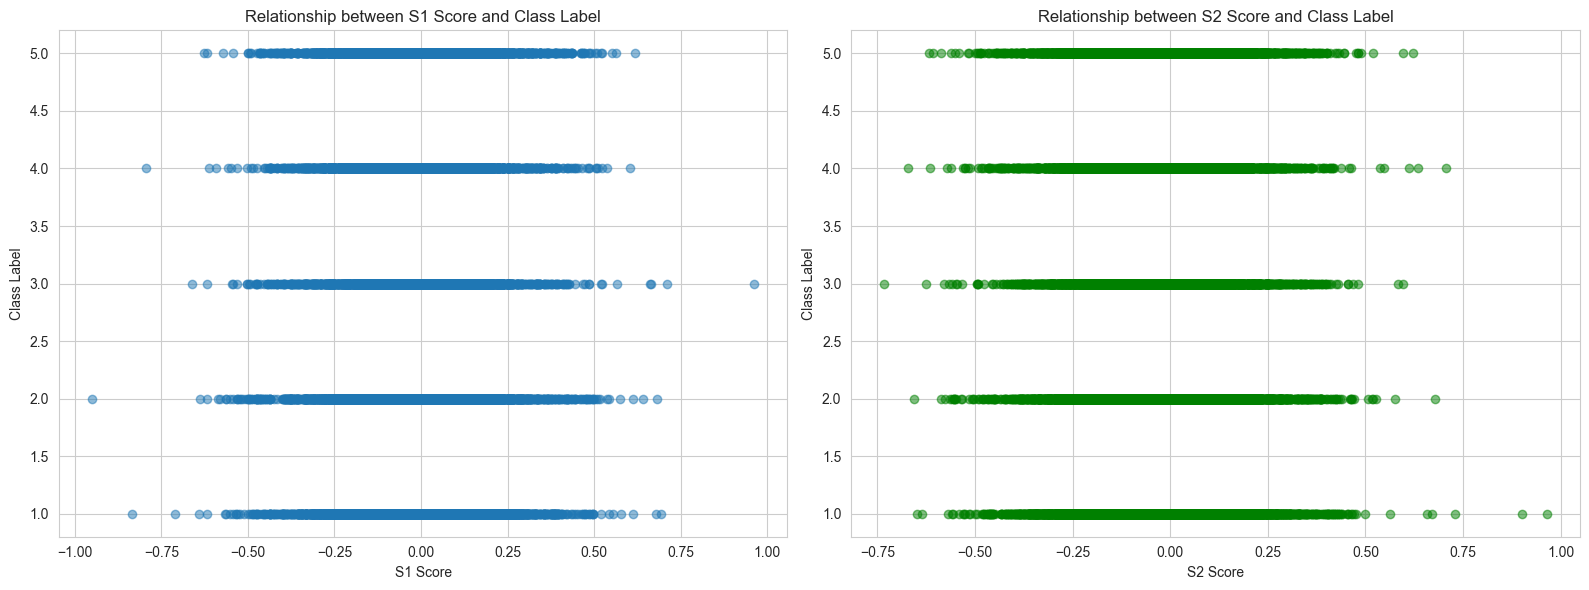

In [58]:
# Calculate text length for T1 and T2
data['T1_length'] = data['T1'].apply(lambda x: len(str(x)))
data['T2_length'] = data['T2'].apply(lambda x: len(str(x)))

# Display basic stats of text lengths
text_length_stats = data[['T1_length', 'T2_length']].describe()

# Explore the relationship between S1, S2 and class label using scatter plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Relationship between S1 and class label
ax[0].scatter(data['S1'], data['class label'], alpha=0.5)
ax[0].set_title('Relationship between S1 Score and Class Label')
ax[0].set_xlabel('S1 Score')
ax[0].set_ylabel('Class Label')

# Relationship between S2 and class label
ax[1].scatter(data['S2'], data['class label'], alpha=0.5, color='green')
ax[1].set_title('Relationship between S2 Score and Class Label')
ax[1].set_xlabel('S2 Score')
ax[1].set_ylabel('Class Label')

plt.tight_layout()
plt.show()

In the graph of S1 versus category labels, there is no clear pattern showing how S1 ratings are associated with specific category labels. The data points appear to be evenly distributed among the class labels. The scatter plot of S2 against the category labels again shows no clear pattern. Nonetheless, the scatter plot of the two scores provides visual information about the distribution of the data points in the different categories.

In [59]:
text_length_stats

,T1_length,T2_length
count,31365.000000,31365.000000
mean,55.671003,145.433955
std,16.349211,59.946581
min,3.000000,3.000000
25%,49.000000,134.000000
50%,60.000000,139.000000
75%,66.000000,144.000000
max,170.000000,450.000000


The average length of T1 texts is about 56 characters, and the median is 60 characters, indicating that most T1 texts are relatively concentrated in length, with the longest T1 text having 170 characters. The average T2 text length is 145 characters, the median is 139 characters, and the longest T2 text has 450 characters. T2 texts vary in length more than T1, with a standard deviation of about 60 characters.

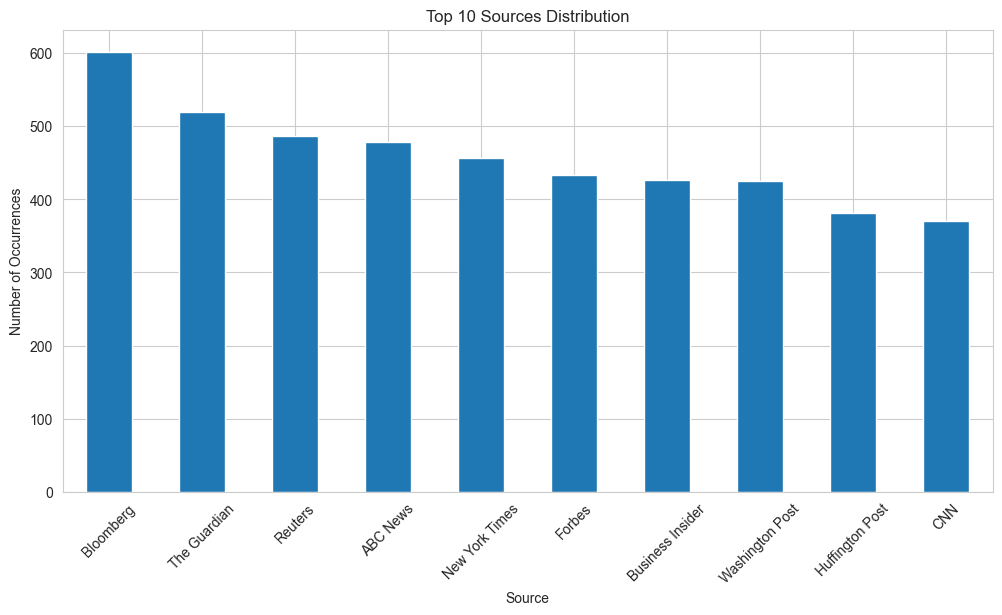

In [60]:
# Visualize the top 10 sources distribution
top_sources = data['S'].value_counts().head(10)  # get the top 10 sources

plt.figure(figsize=(12, 6))
top_sources.plot(kind='bar')
plt.title('Top 10 Sources Distribution')
plt.xlabel('Source')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the top 10 most frequent sources in the dataset, which can further analyze the distribution of sources (S) and the relationship between target objects (TO) and category labels

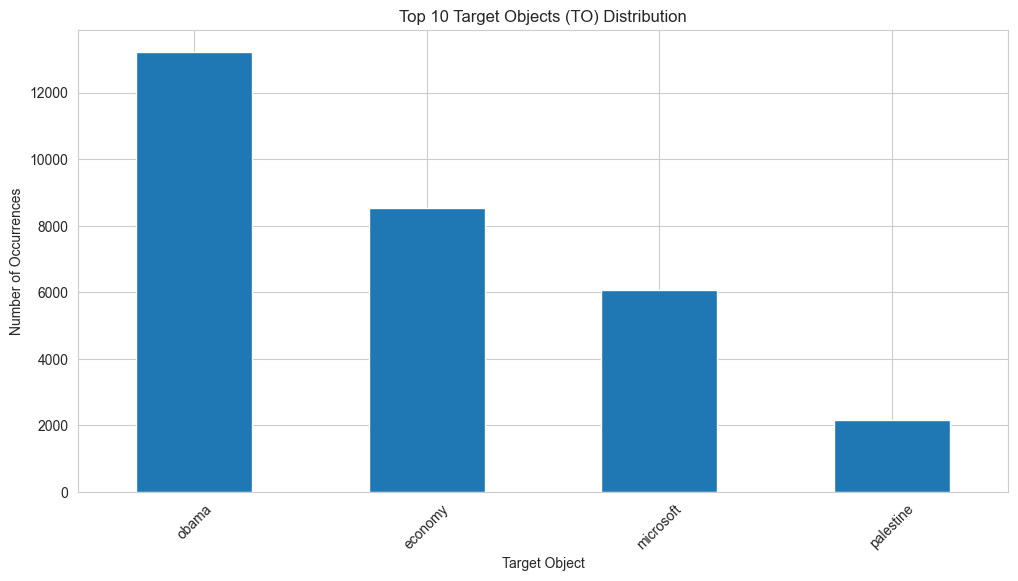

In [61]:
# Visualize the top 10 target objects (TO) distribution
top_targets = data['TO'].value_counts().head(10)  # get the top 10 target objects

plt.figure(figsize=(12, 6))
top_targets.plot(kind='bar')
plt.title('Top 10 Target Objects (TO) Distribution')
plt.xlabel('Target Object')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

The top 10 most frequent objects in the dataset are plotted as bars. This distribution can help us understand which topics or entities are mentioned more frequently in the dataset.

# 2. Data cleaning

## 2.1 drop missing data in class label

In [62]:
# Remove rows where 'class label' is missing
cleaned_data = data.dropna(subset=['class label'])

# After removing those rows, check if there is still any missing data left
missing_data_after_removal = cleaned_data.isnull().sum()
missing_data_after_removal[missing_data_after_removal > 0]

T2    4
S     3
dtype: int64

fill missing data in T2 and S

In [63]:
# Fill in missing values for 'T2' with "No text"
cleaned_data['T2'].fillna("No text", inplace=True)

# Fill in missing values for 'S' with "Unknown"
cleaned_data['S'].fillna("Unknown", inplace=True)

# Verify if all missing values are handled
cleaned_data.isnull().sum()

C:\Users\10754\AppData\Local\Temp\ipykernel_36504\3407342360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['T2'].fillna("No text", inplace=True)
C:\Users\10754\AppData\Local\Temp\ipykernel_36504\3407342360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['S'].fillna("Unknown", inplace=True)


id             0
T1             0
T2             0
S              0
TO             0
S1             0
S2             0
class label    0
T1_length      0
T2_length      0
dtype: int64

## 2.2 combine T1 and T2, create tf-idf matrix

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the CountVectorizer, considering only the top 100 words for demonstration purposes
# this vectorizer will be used in validation and testing
vectorizer = TfidfVectorizer(max_features=1000)

# Fit the vectorizer on the 'T1' and 'T2' columns concatenated together to build a vocabulary
cleaned_data['combined_text'] = cleaned_data['T1'] + " " + cleaned_data['T2']
tfidf_features_train = vectorizer.fit_transform(cleaned_data['combined_text'])

# Convert TF-IDF features to a DataFrame again
tfidf_features_df_train = pd.DataFrame(tfidf_features_train.toarray(),
                                       columns=vectorizer.get_feature_names_out())

tfidf_features_df_train.head()

C:\Users\10754\AppData\Local\Temp\ipykernel_36504\3843899948.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['combined_text'] = cleaned_data['T1'] + " " + cleaned_data['T2']


,000,10,11,12,13,15,16,18,20,2008,...,wrong,xbox,year,years,yesterday,yet,york,you,young,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.3  process TO via Onehot encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
TO_encoded = onehot_encoder.fit_transform(cleaned_data[['TO']])
TO_encoded_df = pd.DataFrame(TO_encoded, columns=[f"TO_{category}" for category in onehot_encoder.categories_[0]])
TO_encoded_df

C:\Users\10754\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,TO_economy,TO_microsoft,TO_obama,TO_palestine
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
29995,0.0,0.0,1.0,0.0
29996,0.0,0.0,1.0,0.0
29997,0.0,0.0,1.0,0.0
29998,0.0,0.0,1.0,0.0


## 2.4  process S via frequency encoding

In [66]:
frequency_encoding = cleaned_data['S'].value_counts(normalize=True)
cleaned_data['S_freq_encoded'] = cleaned_data['S'].map(frequency_encoding)
cleaned_data['S_freq_encoded'].head()

C:\Users\10754\AppData\Local\Temp\ipykernel_36504\2805945035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['S_freq_encoded'] = cleaned_data['S'].map(frequency_encoding)


0    0.006233
1    0.000133
2    0.016233
3    0.003367
4    0.001500
Name: S_freq_encoded, dtype: float64

In [67]:
combined_features = pd.concat([tfidf_features_df_train, cleaned_data[['S1', 'S2']],
                               TO_encoded_df, cleaned_data['S_freq_encoded']], axis=1)
combined_features.tail()

,000,10,11,12,13,15,16,18,20,2008,...,you,young,your,S1,S2,TO_economy,TO_microsoft,TO_obama,TO_palestine,S_freq_encoded
29995,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,-0.197642,-0.197192,0.0,0.0,1.0,0.0,0.001133
29996,0.000000,0.169933,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.251308,0.0,0.0,1.0,0.0,0.008500
29997,0.377265,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.397704,0.0,...,0.000000,0.0,0.0,0.000000,-0.096825,0.0,0.0,1.0,0.0,0.011767
29998,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.143949,0.0,0.0,0.015372,-0.022935,0.0,0.0,1.0,0.0,0.007333
29999,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.041667,-0.066196,0.0,0.0,0.0,1.0,0.011767


## 2.5 Abnormal values detection and processing

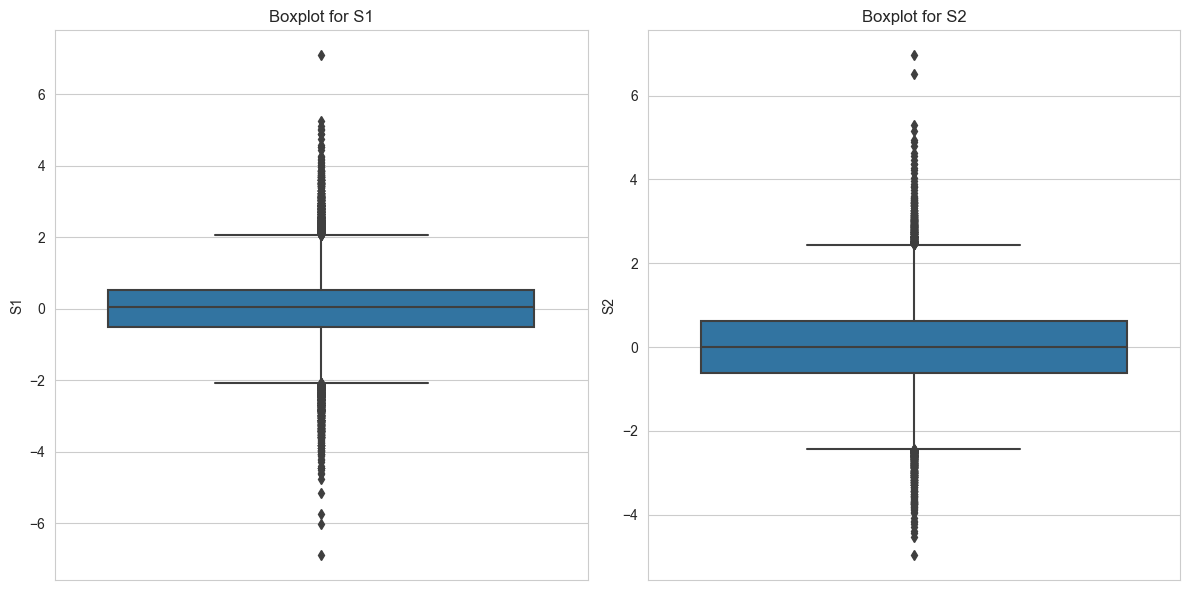

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize 'S1' and 'S2' assuming they are the numeric columns referred to previously
scaler = StandardScaler()
data[['S1', 'S2']] = scaler.fit_transform(data[['S1', 'S2']])

# Now plot the boxplots for 'S1' and 'S2'
plt.figure(figsize=(12, 6))

# Boxplot for 'S1'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=data['S1'])
plt.title('Boxplot for S1')

# Boxplot for 'S2'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(y=data['S2'])
plt.title('Boxplot for S2')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [69]:
Q1 = cleaned_data[['S1', 'S2']].quantile(0.25)
Q3 = cleaned_data[['S1', 'S2']].quantile(0.75)
IQR = Q3 - Q1
bounds = pd.DataFrame()
bounds['lower'] = Q1 - 1.5 * IQR
bounds['upper'] = Q3 + 1.5 * IQR
combined_features['S1'] = cleaned_data['S1'].clip(lower=bounds.loc['S1', 'lower'], upper=bounds.loc['S1', 'upper'])
combined_features['S2'] = cleaned_data['S2'].clip(lower=bounds.loc['S2', 'lower'], upper=bounds.loc['S2', 'upper'])

combined_features.tail()

,000,10,11,12,13,15,16,18,20,2008,...,you,young,your,S1,S2,TO_economy,TO_microsoft,TO_obama,TO_palestine,S_freq_encoded
29995,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,-0.197642,-0.197192,0.0,0.0,1.0,0.0,0.001133
29996,0.000000,0.169933,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.251308,0.0,0.0,1.0,0.0,0.008500
29997,0.377265,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.397704,0.0,...,0.000000,0.0,0.0,0.000000,-0.096825,0.0,0.0,1.0,0.0,0.011767
29998,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.143949,0.0,0.0,0.015372,-0.022935,0.0,0.0,1.0,0.0,0.007333
29999,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.041667,-0.066196,0.0,0.0,0.0,1.0,0.011767


## 2.6  Heatmap

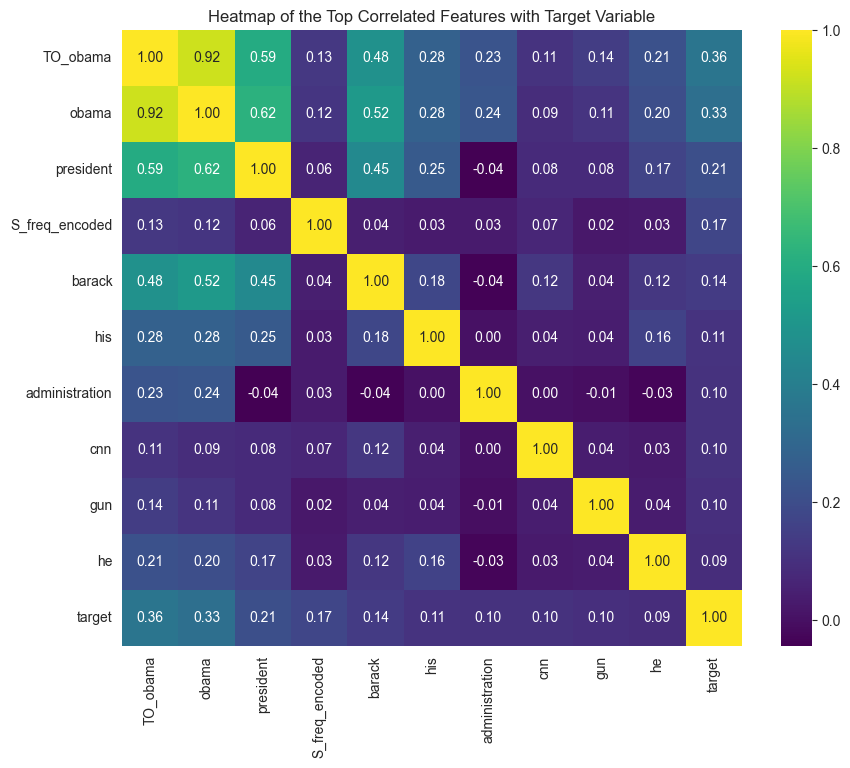

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, add the target variable to the combined features for correlation computation
full_dataset_for_corr = combined_features.copy()
full_dataset_for_corr['target'] = data['class label']

# Calculate the correlation matrix
correlation_matrix = full_dataset_for_corr.corr()

# We'll focus on the correlations of features with the target variable
correlations_with_target = correlation_matrix['target'].sort_values(ascending=False)

# Select top correlated features for heatmap - we can choose a number like 10 for visualization
top_correlated_features = correlations_with_target[1:11].index.tolist()  # Exclude the 'target' correlation with itself

# Now let's plot the heatmap using these top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(full_dataset_for_corr[top_correlated_features + ['target']].corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Heatmap of the Top Correlated Features with Target Variable")
plt.show()

# 3. model building

In [74]:
import numpy as np


class NaiveBayesClassifier:
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        m, n = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize mean, var, and prior
        self.mean = np.zeros((n_classes, n), dtype=np.float64)
        self.var = np.zeros((n_classes, n), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0) + self.alpha  # Apply Laplace smoothing
            self.priors[idx] = X_c.shape[0] / float(m)

    def predict(self, X):
        # Calculate the log probability for each class
        logp = np.log(self.priors) + self._calculate_log_likelihood(X)
        # Return the class with the highest probability
        return self.classes[np.argmax(logp, axis=1)]

    def _calculate_log_likelihood(self, X):
        # Overriding the likelihood calculation to include alpha in the variance
        n_classes, n_features = self.mean.shape
        log_likelihood = np.zeros((X.shape[0], n_classes))

        for idx in range(n_classes):
            mean = self.mean[idx]
            var = self.var[idx]
            # The constant term of the Gaussian log likelihood
            const_term = -0.5 * np.sum(np.log(2. * np.pi * var))
            # The variable term of the Gaussian log likelihood
            var_term = -0.5 * np.sum(((X - mean) ** 2) / var, axis=1)
            log_likelihood[:, idx] = const_term + var_term

        return log_likelihood

In [75]:
nb = NaiveBayesClassifier(alpha=0.5)
X_train = combined_features.values
y_train = cleaned_data['class label'].values
nb.fit(X_train, y_train)

In [79]:
val_data = pd.read_csv(r'./data/validation.csv')
# val_data.isnull().sum()
val_data['S'].fillna("Unknown", inplace=True)
val_data['combined_text'] = val_data['T1'] + " " + val_data['T2']
tfidf_features_val = vectorizer.transform(val_data['combined_text'])

# Convert TF-IDF features to a DataFrame again
tfidf_features_df_val = pd.DataFrame(tfidf_features_val.toarray(),
                                       columns=vectorizer.get_feature_names_out())

TO_encoded = onehot_encoder.transform(val_data[['TO']])
TO_encoded_df = pd.DataFrame(TO_encoded, columns=[f"TO_{category}" for category in onehot_encoder.categories_[0]])

frequency_encoding = val_data['S'].value_counts(normalize=True)
val_data['S_freq_encoded'] = val_data['S'].map(frequency_encoding)

combined_features_val = pd.concat([tfidf_features_df_val, val_data[['S1', 'S2']],
                               TO_encoded_df, val_data['S_freq_encoded']], axis=1)

Q1 = val_data[['S1', 'S2']].quantile(0.25)
Q3 = val_data[['S1', 'S2']].quantile(0.75)
IQR = Q3 - Q1
bounds = pd.DataFrame()
bounds['lower'] = Q1 - 1.5 * IQR
bounds['upper'] = Q3 + 1.5 * IQR
combined_features_val['S1'] = val_data['S1'].clip(lower=bounds.loc['S1', 'lower'], upper=bounds.loc['S1', 'upper'])
combined_features_val['S2'] = val_data['S2'].clip(lower=bounds.loc['S2', 'lower'], upper=bounds.loc['S2', 'upper'])

combined_features_val.tail()

,000,10,11,12,13,15,16,18,20,2008,...,you,young,your,S1,S2,TO_economy,TO_microsoft,TO_obama,TO_palestine,S_freq_encoded
9995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,-0.024056,0.0,0.0,1.0,0.0,0.0029
9996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.098821,-0.076547,0.0,0.0,1.0,0.0,0.0052
9997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.081204,0.0,1.0,0.0,0.0,0.0132
9998,0.0,0.0,0.0,0.275229,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.063789,-0.311034,0.0,0.0,0.0,1.0,0.0050
9999,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.118585,0.034752,0.0,0.0,1.0,0.0,0.0171


In [80]:
val_prediction = nb.predict(combined_features_val.values)

In [81]:
y_val = val_data['class label'].values

In [82]:
from sklearn.metrics import f1_score

micro_f1 = f1_score(y_val, val_prediction, average='micro')
macro_f1 = f1_score(y_val, val_prediction, average='macro')
micro_f1, macro_f1

(0.3329, 0.18320085219602472)

Macro-F1 & Micro-F1 Score are low, because features is complex and are not simple text

In [84]:
test_data = pd.read_csv(r'./data/test.csv')
test_data['T2'].fillna("No text", inplace=True)
test_data['combined_text'] = test_data['T1'] + " " + test_data['T2']
tfidf_features_test = vectorizer.transform(test_data['combined_text'])

# Convert TF-IDF features to a DataFrame again
tfidf_features_df_test = pd.DataFrame(tfidf_features_test.toarray(),
                                       columns=vectorizer.get_feature_names_out())

TO_encoded = onehot_encoder.transform(test_data[['TO']])
TO_encoded_df = pd.DataFrame(TO_encoded, columns=[f"TO_{category}" for category in onehot_encoder.categories_[0]])

frequency_encoding = test_data['S'].value_counts(normalize=True)
test_data['S_freq_encoded'] = test_data['S'].map(frequency_encoding)

combined_features_test = pd.concat([tfidf_features_df_test, test_data[['S1', 'S2']],
                               TO_encoded_df, test_data['S_freq_encoded']], axis=1)

Q1 = test_data[['S1', 'S2']].quantile(0.25)
Q3 = test_data[['S1', 'S2']].quantile(0.75)
IQR = Q3 - Q1
bounds = pd.DataFrame()
bounds['lower'] = Q1 - 1.5 * IQR
bounds['upper'] = Q3 + 1.5 * IQR
combined_features_test['S1'] = test_data['S1'].clip(lower=bounds.loc['S1', 'lower'], upper=bounds.loc['S1', 'upper'])
combined_features_test['S2'] = test_data['S2'].clip(lower=bounds.loc['S2', 'lower'], upper=bounds.loc['S2', 'upper'])

combined_features_test.tail()

,000,10,11,12,13,15,16,18,20,2008,...,you,young,your,S1,S2,TO_economy,TO_microsoft,TO_obama,TO_palestine,S_freq_encoded
7128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,-0.111803,0.080789,0.0,1.0,0.0,0.0,0.000841
7129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.088388,0.147698,1.0,0.0,0.0,0.0,0.001122
7130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.125000,0.224537,0.0,1.0,0.0,0.0,0.004626
7131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.354201,0.0,0.0,0.076389,-0.079167,0.0,1.0,0.0,0.0,0.000280
7132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,-0.039528,-0.028677,0.0,0.0,1.0,0.0,0.008832


In [88]:
test_prediction = nb.predict(combined_features_test.values)

In [98]:
test_data['class label'] = test_prediction
del test_data['combined_text'], test_data['S_freq_encoded']
test_data.to_csv(r'./data/test_output.csv')